# Train Log 20181022 - voxel size: 0.1

## Results
```
2018-10-22 16:46:34.186064   Train one epoch  20 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:50:04.058188  [Epoch 19] mean loss: 0.000116
2018-10-22 16:50:04.059264  [Epoch 19] accuracy: 0.989288
2018-10-22 16:50:04.060110  [Epoch 19] avg class acc: 0.988847
2018-10-22 16:50:04.060436  [Epoch 19] indivisual [0] class recall: 0.992857
2018-10-22 16:50:04.060639  [Epoch 19] indivisual [0] class precision: 0.992857
2018-10-22 16:50:04.060927  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-22 16:50:04.061132  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-22 16:50:04.061286  [Epoch 19] indivisual [2] class recall: 0.973684
2018-10-22 16:50:04.061739  [Epoch 19] indivisual [2] class precision: 0.973684
2018-10-22 16:50:04.061886   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:50:16.422761  [Epoch 19] vali mean loss: 0.000466
2018-10-22 16:50:16.423058  [Epoch 19] vali accuracy: 0.976483
2018-10-22 16:50:16.423958  [Epoch 19] vali avg class acc: 0.333333
2018-10-22 16:50:16.424095  [Epoch 19] vali indivisual [0] class recall: 0.985507
2018-10-22 16:50:16.424448  [Epoch 19] vali indivisual [0] class precision: 0.964539
2018-10-22 16:50:16.424641  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-22 16:50:16.425185  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-22 16:50:16.425284  [Epoch 19] vali indivisual [2] class recall: 0.852941
2018-10-22 16:50:16.425630  [Epoch 19] vali indivisual [2] class precision: 0.935484
2018-10-22 16:50:16.425765   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:50:28.771351  [Epoch 19] test mean loss: 0.000466
2018-10-22 16:50:28.771814  [Epoch 19] test accuracy: 0.975034
2018-10-22 16:50:28.772229  [Epoch 19] test avg class acc: 0.893782
2018-10-22 16:50:28.772699  [Epoch 19] test indivisual [0] class recall: 0.984375
2018-10-22 16:50:28.772817  [Epoch 19] test indivisual [0] class precision: 0.926471
2018-10-22 16:50:28.773064  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-22 16:50:28.773306  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-22 16:50:28.773527  [Epoch 19] test indivisual [2] class recall: 0.696970
2018-10-22 16:50:28.773748  [Epoch 19] test indivisual [2] class precision: 0.920000

```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [3]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_100_20181022_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_100_20181022_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_100_20181022_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181022_v1.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

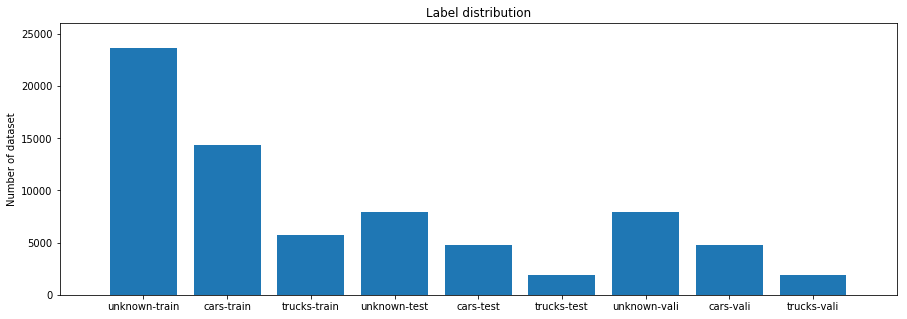

In [4]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [5]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-22 15:32:05.430806   Train one epoch   1 /  20


100%|██████████| 233/233 [03:31<00:00,  1.10it/s]

2018-10-22 15:35:37.132273  [Epoch 0] mean loss: 0.002839
2018-10-22 15:35:37.132626  [Epoch 0] accuracy: 0.804652
2018-10-22 15:35:37.133471  [Epoch 0] avg class acc: 0.863644
2018-10-22 15:35:37.133646  [Epoch 0] indivisual [0] class recall: 0.921429
2018-10-22 15:35:37.133842  [Epoch 0] indivisual [0] class precision: 0.921429
2018-10-22 15:35:37.134120  [Epoch 0] indivisual [1] class recall: 0.934211
2018-10-22 15:35:37.134471  [Epoch 0] indivisual [1] class precision: 0.898734
2018-10-22 15:35:37.134827  [Epoch 0] indivisual [2] class recall: 0.735294
2018-10-22 15:35:37.135128  [Epoch 0] indivisual [2] class precision: 0.806452
2018-10-22 15:35:37.135596   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.67it/s]

2018-10-22 15:35:49.633729  [Epoch 0] vali mean loss: 0.011405
2018-10-22 15:35:49.634107  [Epoch 0] vali accuracy: 0.911793
2018-10-22 15:35:49.634578  [Epoch 0] vali avg class acc: 0.333333
2018-10-22 15:35:49.634885  [Epoch 0] vali indivisual [0] class recall: 0.880000
2018-10-22 15:35:49.635192  [Epoch 0] vali indivisual [0] class precision: 0.916667
2018-10-22 15:35:49.635353  [Epoch 0] vali indivisual [1] class recall: 1.000000
2018-10-22 15:35:49.635496  [Epoch 0] vali indivisual [1] class precision: 0.928571
2018-10-22 15:35:49.635653  [Epoch 0] vali indivisual [2] class recall: 0.705882
2018-10-22 15:35:49.636195  [Epoch 0] vali indivisual [2] class precision: 0.750000
2018-10-22 15:35:49.636436   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]


2018-10-22 15:36:02.170414  [Epoch 0] test mean loss: 0.011405
2018-10-22 15:36:02.171207  [Epoch 0] test accuracy: 0.909586
2018-10-22 15:36:02.171887  [Epoch 0] test avg class acc: 0.787103
2018-10-22 15:36:02.172214  [Epoch 0] test indivisual [0] class recall: 0.956835
2018-10-22 15:36:02.172541  [Epoch 0] test indivisual [0] class precision: 0.898649
2018-10-22 15:36:02.172815  [Epoch 0] test indivisual [1] class recall: 0.975904
2018-10-22 15:36:02.173136  [Epoch 0] test indivisual [1] class precision: 0.941860
2018-10-22 15:36:02.173287  [Epoch 0] test indivisual [2] class recall: 0.428571
2018-10-22 15:36:02.173483  [Epoch 0] test indivisual [2] class precision: 0.750000
2018-10-22 15:36:03.056611  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181022_v1/model/model.ckpt
2018-10-22 15:36:03.057372   Train one epoch   2 /  20


100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 15:39:33.385308  [Epoch 1] mean loss: 0.001063
2018-10-22 15:39:33.385885  [Epoch 1] accuracy: 0.894421
2018-10-22 15:39:33.386508  [Epoch 1] avg class acc: 0.894445
2018-10-22 15:39:33.386839  [Epoch 1] indivisual [0] class recall: 0.924242
2018-10-22 15:39:33.387260  [Epoch 1] indivisual [0] class precision: 0.931298
2018-10-22 15:39:33.387632  [Epoch 1] indivisual [1] class recall: 0.975309
2018-10-22 15:39:33.387739  [Epoch 1] indivisual [1] class precision: 0.975309
2018-10-22 15:39:33.387832  [Epoch 1] indivisual [2] class recall: 0.783784
2018-10-22 15:39:33.388261  [Epoch 1] indivisual [2] class precision: 0.763158
2018-10-22 15:39:33.388396   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 15:39:45.745061  [Epoch 1] vali mean loss: 0.004272
2018-10-22 15:39:45.745561  [Epoch 1] vali accuracy: 0.902897
2018-10-22 15:39:45.746256  [Epoch 1] vali avg class acc: 0.000000
2018-10-22 15:39:45.746598  [Epoch 1] vali indivisual [0] class recall: 0.888889
2018-10-22 15:39:45.746897  [Epoch 1] vali indivisual [0] class precision: 0.967742
2018-10-22 15:39:45.747392  [Epoch 1] vali indivisual [1] class recall: 0.949367
2018-10-22 15:39:45.747506  [Epoch 1] vali indivisual [1] class precision: 0.961538
2018-10-22 15:39:45.747750  [Epoch 1] vali indivisual [2] class recall: 0.888889
2018-10-22 15:39:45.748067  [Epoch 1] vali indivisual [2] class precision: 0.666667
2018-10-22 15:39:45.748346   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 15:39:58.142349  [Epoch 1] test mean loss: 0.004272
2018-10-22 15:39:58.143370  [Epoch 1] test accuracy: 0.902966
2018-10-22 15:39:58.143854  [Epoch 1] test avg class acc: 0.788665
2018-10-22 15:39:58.144201  [Epoch 1] test indivisual [0] class recall: 0.880282
2018-10-22 15:39:58.144381  [Epoch 1] test indivisual [0] class precision: 0.919118
2018-10-22 15:39:58.144547  [Epoch 1] test indivisual [1] class recall: 0.950000
2018-10-22 15:39:58.144873  [Epoch 1] test indivisual [1] class precision: 0.904762
2018-10-22 15:39:58.145304  [Epoch 1] test indivisual [2] class recall: 0.535714
2018-10-22 15:39:58.145570  [Epoch 1] test indivisual [2] class precision: 0.500000
2018-10-22 15:39:58.146003   Train one epoch   3 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 15:43:28.314165  [Epoch 2] mean loss: 0.001176
2018-10-22 15:43:28.314525  [Epoch 2] accuracy: 0.887176
2018-10-22 15:43:28.315111  [Epoch 2] avg class acc: 0.876395
2018-10-22 15:43:28.315681  [Epoch 2] indivisual [0] class recall: 0.928058
2018-10-22 15:43:28.315848  [Epoch 2] indivisual [0] class precision: 0.934783
2018-10-22 15:43:28.316130  [Epoch 2] indivisual [1] class recall: 0.986842
2018-10-22 15:43:28.316293  [Epoch 2] indivisual [1] class precision: 0.961538
2018-10-22 15:43:28.316845  [Epoch 2] indivisual [2] class recall: 0.714286
2018-10-22 15:43:28.317297  [Epoch 2] indivisual [2] class precision: 0.735294
2018-10-22 15:43:28.317573   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 15:43:40.725572  [Epoch 2] vali mean loss: 0.004724
2018-10-22 15:43:40.725988  [Epoch 2] vali accuracy: 0.886138
2018-10-22 15:43:40.726706  [Epoch 2] vali avg class acc: 0.000000
2018-10-22 15:43:40.727159  [Epoch 2] vali indivisual [0] class recall: 0.833333
2018-10-22 15:43:40.727317  [Epoch 2] vali indivisual [0] class precision: 0.920000
2018-10-22 15:43:40.727544  [Epoch 2] vali indivisual [1] class recall: 0.987500
2018-10-22 15:43:40.727776  [Epoch 2] vali indivisual [1] class precision: 0.963415
2018-10-22 15:43:40.728353  [Epoch 2] vali indivisual [2] class recall: 0.656250
2018-10-22 15:43:40.728625  [Epoch 2] vali indivisual [2] class precision: 0.488372
2018-10-22 15:43:40.728810   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 15:43:53.134561  [Epoch 2] test mean loss: 0.004724
2018-10-22 15:43:53.135006  [Epoch 2] test accuracy: 0.888966
2018-10-22 15:43:53.135901  [Epoch 2] test avg class acc: 0.909714
2018-10-22 15:43:53.136217  [Epoch 2] test indivisual [0] class recall: 0.910959
2018-10-22 15:43:53.136362  [Epoch 2] test indivisual [0] class precision: 0.970803
2018-10-22 15:43:53.136590  [Epoch 2] test indivisual [1] class recall: 1.000000
2018-10-22 15:43:53.136852  [Epoch 2] test indivisual [1] class precision: 0.976190
2018-10-22 15:43:53.137103  [Epoch 2] test indivisual [2] class recall: 0.818182
2018-10-22 15:43:53.137250  [Epoch 2] test indivisual [2] class precision: 0.620690
2018-10-22 15:43:53.137422   Train one epoch   4 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 15:47:23.481403  [Epoch 3] mean loss: 0.000676
2018-10-22 15:47:23.482263  [Epoch 3] accuracy: 0.931176
2018-10-22 15:47:23.482766  [Epoch 3] avg class acc: 0.896702
2018-10-22 15:47:23.483141  [Epoch 3] indivisual [0] class recall: 0.928571
2018-10-22 15:47:23.483615  [Epoch 3] indivisual [0] class precision: 0.948905
2018-10-22 15:47:23.483901  [Epoch 3] indivisual [1] class recall: 0.987342
2018-10-22 15:47:23.484033  [Epoch 3] indivisual [1] class precision: 0.975000
2018-10-22 15:47:23.484166  [Epoch 3] indivisual [2] class recall: 0.774194
2018-10-22 15:47:23.484427  [Epoch 3] indivisual [2] class precision: 0.727273
2018-10-22 15:47:23.484635   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 15:47:35.887194  [Epoch 3] vali mean loss: 0.002714
2018-10-22 15:47:35.888560  [Epoch 3] vali accuracy: 0.943034
2018-10-22 15:47:35.889057  [Epoch 3] vali avg class acc: 0.000000
2018-10-22 15:47:35.889259  [Epoch 3] vali indivisual [0] class recall: 0.939850
2018-10-22 15:47:35.889501  [Epoch 3] vali indivisual [0] class precision: 0.946970
2018-10-22 15:47:35.890092  [Epoch 3] vali indivisual [1] class recall: 0.976744
2018-10-22 15:47:35.890190  [Epoch 3] vali indivisual [1] class precision: 1.000000
2018-10-22 15:47:35.890536  [Epoch 3] vali indivisual [2] class recall: 0.838710
2018-10-22 15:47:35.890796  [Epoch 3] vali indivisual [2] class precision: 0.764706
2018-10-22 15:47:35.890988   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:12<00:00,  4.68it/s]

2018-10-22 15:47:48.387056  [Epoch 3] test mean loss: 0.002714
2018-10-22 15:47:48.387473  [Epoch 3] test accuracy: 0.941103
2018-10-22 15:47:48.388462  [Epoch 3] test avg class acc: 0.919884
2018-10-22 15:47:48.388664  [Epoch 3] test indivisual [0] class recall: 0.945578
2018-10-22 15:47:48.388972  [Epoch 3] test indivisual [0] class precision: 0.972028
2018-10-22 15:47:48.389416  [Epoch 3] test indivisual [1] class recall: 0.986486
2018-10-22 15:47:48.389524  [Epoch 3] test indivisual [1] class precision: 0.960526
2018-10-22 15:47:48.389801  [Epoch 3] test indivisual [2] class recall: 0.827586
2018-10-22 15:47:48.390067  [Epoch 3] test indivisual [2] class precision: 0.774194
2018-10-22 15:47:48.390308   Train one epoch   5 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 15:51:18.939468  [Epoch 4] mean loss: 0.000525
2018-10-22 15:51:18.940363  [Epoch 4] accuracy: 0.947399
2018-10-22 15:51:18.941047  [Epoch 4] avg class acc: 0.941221
2018-10-22 15:51:18.941388  [Epoch 4] indivisual [0] class recall: 0.943662
2018-10-22 15:51:18.941705  [Epoch 4] indivisual [0] class precision: 0.978102
2018-10-22 15:51:18.941996  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-22 15:51:18.942327  [Epoch 4] indivisual [1] class precision: 1.000000
2018-10-22 15:51:18.942517  [Epoch 4] indivisual [2] class recall: 0.880000
2018-10-22 15:51:18.942842  [Epoch 4] indivisual [2] class precision: 0.733333
2018-10-22 15:51:18.943265   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 15:51:31.348247  [Epoch 4] vali mean loss: 0.002109
2018-10-22 15:51:31.348614  [Epoch 4] vali accuracy: 0.954345
2018-10-22 15:51:31.349027  [Epoch 4] vali avg class acc: 0.000000
2018-10-22 15:51:31.349577  [Epoch 4] vali indivisual [0] class recall: 0.963235
2018-10-22 15:51:31.349792  [Epoch 4] vali indivisual [0] class precision: 0.956204
2018-10-22 15:51:31.349958  [Epoch 4] vali indivisual [1] class recall: 0.987342
2018-10-22 15:51:31.350250  [Epoch 4] vali indivisual [1] class precision: 0.975000
2018-10-22 15:51:31.350438  [Epoch 4] vali indivisual [2] class recall: 0.828571
2018-10-22 15:51:31.350813  [Epoch 4] vali indivisual [2] class precision: 0.878788
2018-10-22 15:51:31.351157   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 15:51:43.747819  [Epoch 4] test mean loss: 0.002109
2018-10-22 15:51:43.748105  [Epoch 4] test accuracy: 0.951517
2018-10-22 15:51:43.748638  [Epoch 4] test avg class acc: 0.963735
2018-10-22 15:51:43.749238  [Epoch 4] test indivisual [0] class recall: 0.965278
2018-10-22 15:51:43.749475  [Epoch 4] test indivisual [0] class precision: 0.985816
2018-10-22 15:51:43.749942  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-22 15:51:43.750045  [Epoch 4] test indivisual [1] class precision: 0.975309
2018-10-22 15:51:43.750314  [Epoch 4] test indivisual [2] class recall: 0.925926
2018-10-22 15:51:43.750567  [Epoch 4] test indivisual [2] class precision: 0.892857
2018-10-22 15:51:43.750730   Train one epoch   6 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 15:55:14.144590  [Epoch 5] mean loss: 0.000518
2018-10-22 15:55:14.145289  [Epoch 5] accuracy: 0.948841
2018-10-22 15:55:14.145950  [Epoch 5] avg class acc: 0.903571
2018-10-22 15:55:14.146228  [Epoch 5] indivisual [0] class recall: 0.925000
2018-10-22 15:55:14.146362  [Epoch 5] indivisual [0] class precision: 0.967320
2018-10-22 15:55:14.146616  [Epoch 5] indivisual [1] class recall: 1.000000
2018-10-22 15:55:14.146928  [Epoch 5] indivisual [1] class precision: 0.911765
2018-10-22 15:55:14.147189  [Epoch 5] indivisual [2] class recall: 0.785714
2018-10-22 15:55:14.147394  [Epoch 5] indivisual [2] class precision: 0.758621
2018-10-22 15:55:14.147728   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-22 15:55:26.604495  [Epoch 5] vali mean loss: 0.002081
2018-10-22 15:55:26.604761  [Epoch 5] vali accuracy: 0.949379
2018-10-22 15:55:26.605539  [Epoch 5] vali avg class acc: 0.000000
2018-10-22 15:55:26.605680  [Epoch 5] vali indivisual [0] class recall: 0.965035
2018-10-22 15:55:26.606253  [Epoch 5] vali indivisual [0] class precision: 0.932432
2018-10-22 15:55:26.606373  [Epoch 5] vali indivisual [1] class recall: 0.958904
2018-10-22 15:55:26.606653  [Epoch 5] vali indivisual [1] class precision: 0.972222
2018-10-22 15:55:26.607112  [Epoch 5] vali indivisual [2] class recall: 0.794118
2018-10-22 15:55:26.607390  [Epoch 5] vali indivisual [2] class precision: 0.900000
2018-10-22 15:55:26.607491   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 15:55:39.003426  [Epoch 5] test mean loss: 0.002081
2018-10-22 15:55:39.004226  [Epoch 5] test accuracy: 0.947862
2018-10-22 15:55:39.005720  [Epoch 5] test avg class acc: 0.920004
2018-10-22 15:55:39.006145  [Epoch 5] test indivisual [0] class recall: 0.946565
2018-10-22 15:55:39.006670  [Epoch 5] test indivisual [0] class precision: 0.939394
2018-10-22 15:55:39.007108  [Epoch 5] test indivisual [1] class recall: 0.975610
2018-10-22 15:55:39.007220  [Epoch 5] test indivisual [1] class precision: 1.000000
2018-10-22 15:55:39.007502  [Epoch 5] test indivisual [2] class recall: 0.837838
2018-10-22 15:55:39.007770  [Epoch 5] test indivisual [2] class precision: 0.815789
2018-10-22 15:55:39.008208   Train one epoch   7 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 15:59:09.359486  [Epoch 6] mean loss: 0.000442
2018-10-22 15:59:09.360518  [Epoch 6] accuracy: 0.955760
2018-10-22 15:59:09.361064  [Epoch 6] avg class acc: 0.947213
2018-10-22 15:59:09.361218  [Epoch 6] indivisual [0] class recall: 0.984496
2018-10-22 15:59:09.361563  [Epoch 6] indivisual [0] class precision: 0.954887
2018-10-22 15:59:09.361719  [Epoch 6] indivisual [1] class recall: 1.000000
2018-10-22 15:59:09.361915  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-22 15:59:09.362333  [Epoch 6] indivisual [2] class recall: 0.857143
2018-10-22 15:59:09.362601  [Epoch 6] indivisual [2] class precision: 0.947368
2018-10-22 15:59:09.363068   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 15:59:21.714623  [Epoch 6] vali mean loss: 0.001777
2018-10-22 15:59:21.715473  [Epoch 6] vali accuracy: 0.961379
2018-10-22 15:59:21.715906  [Epoch 6] vali avg class acc: 0.333333
2018-10-22 15:59:21.716093  [Epoch 6] vali indivisual [0] class recall: 0.977099
2018-10-22 15:59:21.716358  [Epoch 6] vali indivisual [0] class precision: 0.948148
2018-10-22 15:59:21.716687  [Epoch 6] vali indivisual [1] class recall: 1.000000
2018-10-22 15:59:21.716965  [Epoch 6] vali indivisual [1] class precision: 0.987500
2018-10-22 15:59:21.717132  [Epoch 6] vali indivisual [2] class recall: 0.800000
2018-10-22 15:59:21.717454  [Epoch 6] vali indivisual [2] class precision: 0.914286
2018-10-22 15:59:21.717781   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 15:59:34.112879  [Epoch 6] test mean loss: 0.001777
2018-10-22 15:59:34.113595  [Epoch 6] test accuracy: 0.962828
2018-10-22 15:59:34.114229  [Epoch 6] test avg class acc: 0.943844
2018-10-22 15:59:34.114554  [Epoch 6] test indivisual [0] class recall: 0.966667
2018-10-22 15:59:34.114707  [Epoch 6] test indivisual [0] class precision: 0.958678
2018-10-22 15:59:34.115127  [Epoch 6] test indivisual [1] class recall: 1.000000
2018-10-22 15:59:34.115417  [Epoch 6] test indivisual [1] class precision: 1.000000
2018-10-22 15:59:34.115861  [Epoch 6] test indivisual [2] class recall: 0.864865
2018-10-22 15:59:34.116133  [Epoch 6] test indivisual [2] class precision: 0.888889
2018-10-22 15:59:34.116242   Train one epoch   8 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:03:04.339789  [Epoch 7] mean loss: 0.000361
2018-10-22 16:03:04.340135  [Epoch 7] accuracy: 0.968996
2018-10-22 16:03:04.340782  [Epoch 7] avg class acc: 0.898852
2018-10-22 16:03:04.341111  [Epoch 7] indivisual [0] class recall: 0.919118
2018-10-22 16:03:04.341301  [Epoch 7] indivisual [0] class precision: 0.946970
2018-10-22 16:03:04.341463  [Epoch 7] indivisual [1] class recall: 0.902439
2018-10-22 16:03:04.341636  [Epoch 7] indivisual [1] class precision: 0.986667
2018-10-22 16:03:04.342336  [Epoch 7] indivisual [2] class recall: 0.875000
2018-10-22 16:03:04.342500  [Epoch 7] indivisual [2] class precision: 0.651163
2018-10-22 16:03:04.342635   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:03:16.699676  [Epoch 7] vali mean loss: 0.001452
2018-10-22 16:03:16.700550  [Epoch 7] vali accuracy: 0.748000
2018-10-22 16:03:16.700973  [Epoch 7] vali avg class acc: 0.000000
2018-10-22 16:03:16.701316  [Epoch 7] vali indivisual [0] class recall: 0.944000
2018-10-22 16:03:16.701627  [Epoch 7] vali indivisual [0] class precision: 0.674286
2018-10-22 16:03:16.701779  [Epoch 7] vali indivisual [1] class recall: 0.482353
2018-10-22 16:03:16.702334  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-22 16:03:16.702438  [Epoch 7] vali indivisual [2] class recall: 0.500000
2018-10-22 16:03:16.702723  [Epoch 7] vali indivisual [2] class precision: 0.588235
2018-10-22 16:03:16.702997   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 16:03:29.101235  [Epoch 7] test mean loss: 0.001452
2018-10-22 16:03:29.102132  [Epoch 7] test accuracy: 0.755724
2018-10-22 16:03:29.102423  [Epoch 7] test avg class acc: 0.632830
2018-10-22 16:03:29.103028  [Epoch 7] test indivisual [0] class recall: 0.929688
2018-10-22 16:03:29.103228  [Epoch 7] test indivisual [0] class precision: 0.680000
2018-10-22 16:03:29.103555  [Epoch 7] test indivisual [1] class recall: 0.540230
2018-10-22 16:03:29.103837  [Epoch 7] test indivisual [1] class precision: 0.979167
2018-10-22 16:03:29.104265  [Epoch 7] test indivisual [2] class recall: 0.428571
2018-10-22 16:03:29.104369  [Epoch 7] test indivisual [2] class precision: 0.555556
2018-10-22 16:03:29.104647   Train one epoch   9 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 16:06:59.374749  [Epoch 8] mean loss: 0.000609
2018-10-22 16:06:59.375088  [Epoch 8] accuracy: 0.942781
2018-10-22 16:06:59.375844  [Epoch 8] avg class acc: 0.909852
2018-10-22 16:06:59.376212  [Epoch 8] indivisual [0] class recall: 0.964286
2018-10-22 16:06:59.376460  [Epoch 8] indivisual [0] class precision: 0.915254
2018-10-22 16:06:59.376631  [Epoch 8] indivisual [1] class recall: 0.971154
2018-10-22 16:06:59.377140  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-22 16:06:59.377468  [Epoch 8] indivisual [2] class recall: 0.794118
2018-10-22 16:06:59.377756  [Epoch 8] indivisual [2] class precision: 0.870968
2018-10-22 16:06:59.378194   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:07:11.734081  [Epoch 8] vali mean loss: 0.002447
2018-10-22 16:07:11.734814  [Epoch 8] vali accuracy: 0.923517
2018-10-22 16:07:11.735440  [Epoch 8] vali avg class acc: 0.000000
2018-10-22 16:07:11.735632  [Epoch 8] vali indivisual [0] class recall: 0.918033
2018-10-22 16:07:11.735814  [Epoch 8] vali indivisual [0] class precision: 0.957265
2018-10-22 16:07:11.736325  [Epoch 8] vali indivisual [1] class recall: 0.990099
2018-10-22 16:07:11.736462  [Epoch 8] vali indivisual [1] class precision: 0.990099
2018-10-22 16:07:11.736960  [Epoch 8] vali indivisual [2] class recall: 0.814815
2018-10-22 16:07:11.737165  [Epoch 8] vali indivisual [2] class precision: 0.687500
2018-10-22 16:07:11.737320   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 16:07:24.180844  [Epoch 8] test mean loss: 0.002447
2018-10-22 16:07:24.181656  [Epoch 8] test accuracy: 0.927310
2018-10-22 16:07:24.183443  [Epoch 8] test avg class acc: 0.920517
2018-10-22 16:07:24.183808  [Epoch 8] test indivisual [0] class recall: 0.890625
2018-10-22 16:07:24.184064  [Epoch 8] test indivisual [0] class precision: 0.950000
2018-10-22 16:07:24.184676  [Epoch 8] test indivisual [1] class recall: 0.976190
2018-10-22 16:07:24.184783  [Epoch 8] test indivisual [1] class precision: 0.976190
2018-10-22 16:07:24.185211  [Epoch 8] test indivisual [2] class recall: 0.894737
2018-10-22 16:07:24.185312  [Epoch 8] test indivisual [2] class precision: 0.739130
2018-10-22 16:07:24.185599   Train one epoch  10 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:10:54.162581  [Epoch 9] mean loss: 0.000352
2018-10-22 16:10:54.163367  [Epoch 9] accuracy: 0.965133
2018-10-22 16:10:54.163733  [Epoch 9] avg class acc: 0.976969
2018-10-22 16:10:54.164050  [Epoch 9] indivisual [0] class recall: 0.984962
2018-10-22 16:10:54.164456  [Epoch 9] indivisual [0] class precision: 0.984962
2018-10-22 16:10:54.165049  [Epoch 9] indivisual [1] class recall: 1.000000
2018-10-22 16:10:54.165425  [Epoch 9] indivisual [1] class precision: 1.000000
2018-10-22 16:10:54.165529  [Epoch 9] indivisual [2] class recall: 0.945946
2018-10-22 16:10:54.165972  [Epoch 9] indivisual [2] class precision: 0.945946
2018-10-22 16:10:54.166072   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:11:06.522474  [Epoch 9] vali mean loss: 0.001412
2018-10-22 16:11:06.523325  [Epoch 9] vali accuracy: 0.956207
2018-10-22 16:11:06.523757  [Epoch 9] vali avg class acc: 0.333333
2018-10-22 16:11:06.524269  [Epoch 9] vali indivisual [0] class recall: 0.953125
2018-10-22 16:11:06.524559  [Epoch 9] vali indivisual [0] class precision: 0.960630
2018-10-22 16:11:06.524929  [Epoch 9] vali indivisual [1] class recall: 1.000000
2018-10-22 16:11:06.525036  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-22 16:11:06.525548  [Epoch 9] vali indivisual [2] class recall: 0.878049
2018-10-22 16:11:06.525698  [Epoch 9] vali indivisual [2] class precision: 0.857143
2018-10-22 16:11:06.525919   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:11:18.872259  [Epoch 9] test mean loss: 0.001412
2018-10-22 16:11:18.872520  [Epoch 9] test accuracy: 0.957448
2018-10-22 16:11:18.872850  [Epoch 9] test avg class acc: 0.956848
2018-10-22 16:11:18.873437  [Epoch 9] test indivisual [0] class recall: 0.975806
2018-10-22 16:11:18.873875  [Epoch 9] test indivisual [0] class precision: 0.968000
2018-10-22 16:11:18.873981  [Epoch 9] test indivisual [1] class recall: 1.000000
2018-10-22 16:11:18.874246  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-22 16:11:18.874517  [Epoch 9] test indivisual [2] class recall: 0.894737
2018-10-22 16:11:18.874882  [Epoch 9] test indivisual [2] class precision: 0.918919
2018-10-22 16:11:18.875072   Train one epoch  11 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:14:48.801291  [Epoch 10] mean loss: 0.000269
2018-10-22 16:14:48.801808  [Epoch 10] accuracy: 0.973579
2018-10-22 16:14:48.802289  [Epoch 10] avg class acc: 0.979947
2018-10-22 16:14:48.802581  [Epoch 10] indivisual [0] class recall: 0.985294
2018-10-22 16:14:48.803020  [Epoch 10] indivisual [0] class precision: 0.992593
2018-10-22 16:14:48.803323  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-22 16:14:48.803752  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-22 16:14:48.803860  [Epoch 10] indivisual [2] class recall: 0.954545
2018-10-22 16:14:48.804292  [Epoch 10] indivisual [2] class precision: 0.913043
2018-10-22 16:14:48.804394   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 16:15:01.209575  [Epoch 10] vali mean loss: 0.001082
2018-10-22 16:15:01.209908  [Epoch 10] vali accuracy: 0.960138
2018-10-22 16:15:01.210321  [Epoch 10] vali avg class acc: 0.000000
2018-10-22 16:15:01.210907  [Epoch 10] vali indivisual [0] class recall: 0.929688
2018-10-22 16:15:01.211161  [Epoch 10] vali indivisual [0] class precision: 0.959677
2018-10-22 16:15:01.211330  [Epoch 10] vali indivisual [1] class recall: 0.988636
2018-10-22 16:15:01.211487  [Epoch 10] vali indivisual [1] class precision: 0.988636
2018-10-22 16:15:01.211659  [Epoch 10] vali indivisual [2] class recall: 0.882353
2018-10-22 16:15:01.212243  [Epoch 10] vali indivisual [2] class precision: 0.789474
2018-10-22 16:15:01.212517   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]


2018-10-22 16:15:13.556366  [Epoch 10] test mean loss: 0.001082
2018-10-22 16:15:13.556620  [Epoch 10] test accuracy: 0.961172
2018-10-22 16:15:13.557219  [Epoch 10] test avg class acc: 0.952394
2018-10-22 16:15:13.557441  [Epoch 10] test indivisual [0] class recall: 0.970149
2018-10-22 16:15:13.557600  [Epoch 10] test indivisual [0] class precision: 0.984848
2018-10-22 16:15:13.557873  [Epoch 10] test indivisual [1] class recall: 0.967033
2018-10-22 16:15:13.558077  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-22 16:15:13.558758  [Epoch 10] test indivisual [2] class recall: 0.920000
2018-10-22 16:15:13.559146  [Epoch 10] test indivisual [2] class precision: 0.766667
2018-10-22 16:15:14.406028  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181022_v1/model/model.ckpt
2018-10-22 16:15:14.406275   Train one epoch  12 /  20


100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:18:44.348241  [Epoch 11] mean loss: 0.000222
2018-10-22 16:18:44.349018  [Epoch 11] accuracy: 0.978627
2018-10-22 16:18:44.350990  [Epoch 11] avg class acc: 0.963812
2018-10-22 16:18:44.351484  [Epoch 11] indivisual [0] class recall: 0.985185
2018-10-22 16:18:44.351993  [Epoch 11] indivisual [0] class precision: 0.992537
2018-10-22 16:18:44.352282  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-22 16:18:44.352389  [Epoch 11] indivisual [1] class precision: 0.976471
2018-10-22 16:18:44.352672  [Epoch 11] indivisual [2] class recall: 0.906250
2018-10-22 16:18:44.352947  [Epoch 11] indivisual [2] class precision: 0.935484
2018-10-22 16:18:44.353111   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:18:56.708475  [Epoch 11] vali mean loss: 0.000893
2018-10-22 16:18:56.709062  [Epoch 11] vali accuracy: 0.964138
2018-10-22 16:18:56.709591  [Epoch 11] vali avg class acc: 0.000000
2018-10-22 16:18:56.710026  [Epoch 11] vali indivisual [0] class recall: 0.933824
2018-10-22 16:18:56.710388  [Epoch 11] vali indivisual [0] class precision: 0.969466
2018-10-22 16:18:56.710488  [Epoch 11] vali indivisual [1] class recall: 0.987342
2018-10-22 16:18:56.710839  [Epoch 11] vali indivisual [1] class precision: 1.000000
2018-10-22 16:18:56.710930  [Epoch 11] vali indivisual [2] class recall: 0.914286
2018-10-22 16:18:56.711280  [Epoch 11] vali indivisual [2] class precision: 0.780488
2018-10-22 16:18:56.711401   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:19:09.054724  [Epoch 11] test mean loss: 0.000893
2018-10-22 16:19:09.054941  [Epoch 11] test accuracy: 0.963172
2018-10-22 16:19:09.057028  [Epoch 11] test avg class acc: 0.957547
2018-10-22 16:19:09.057544  [Epoch 11] test indivisual [0] class recall: 0.941606
2018-10-22 16:19:09.058001  [Epoch 11] test indivisual [0] class precision: 0.984733
2018-10-22 16:19:09.058365  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-22 16:19:09.058645  [Epoch 11] test indivisual [1] class precision: 0.988235
2018-10-22 16:19:09.058874  [Epoch 11] test indivisual [2] class recall: 0.931034
2018-10-22 16:19:09.059161  [Epoch 11] test indivisual [2] class precision: 0.794118
2018-10-22 16:19:09.059475   Train one epoch  13 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:22:39.197969  [Epoch 12] mean loss: 0.000205
2018-10-22 16:22:39.198784  [Epoch 12] accuracy: 0.979674
2018-10-22 16:22:39.199396  [Epoch 12] avg class acc: 0.947389
2018-10-22 16:22:39.199605  [Epoch 12] indivisual [0] class recall: 0.972603
2018-10-22 16:22:39.200102  [Epoch 12] indivisual [0] class precision: 0.979310
2018-10-22 16:22:39.200390  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-22 16:22:39.200757  [Epoch 12] indivisual [1] class precision: 1.000000
2018-10-22 16:22:39.200958  [Epoch 12] indivisual [2] class recall: 0.869565
2018-10-22 16:22:39.201378  [Epoch 12] indivisual [2] class precision: 0.833333
2018-10-22 16:22:39.201482   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.71it/s]

2018-10-22 16:22:51.669301  [Epoch 12] vali mean loss: 0.000824
2018-10-22 16:22:51.670046  [Epoch 12] vali accuracy: 0.960414
2018-10-22 16:22:51.670557  [Epoch 12] vali avg class acc: 0.333333
2018-10-22 16:22:51.671161  [Epoch 12] vali indivisual [0] class recall: 0.991597
2018-10-22 16:22:51.671385  [Epoch 12] vali indivisual [0] class precision: 0.914729
2018-10-22 16:22:51.671900  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-22 16:22:51.672180  [Epoch 12] vali indivisual [1] class precision: 1.000000
2018-10-22 16:22:51.672597  [Epoch 12] vali indivisual [2] class recall: 0.666667
2018-10-22 16:22:51.672698  [Epoch 12] vali indivisual [2] class precision: 0.956522
2018-10-22 16:22:51.673062   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:23:04.018453  [Epoch 12] test mean loss: 0.000824
2018-10-22 16:23:04.018712  [Epoch 12] test accuracy: 0.960552
2018-10-22 16:23:04.020764  [Epoch 12] test avg class acc: 0.925926
2018-10-22 16:23:04.020941  [Epoch 12] test indivisual [0] class recall: 1.000000
2018-10-22 16:23:04.021156  [Epoch 12] test indivisual [0] class precision: 0.958621
2018-10-22 16:23:04.021445  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-22 16:23:04.022096  [Epoch 12] test indivisual [1] class precision: 1.000000
2018-10-22 16:23:04.022363  [Epoch 12] test indivisual [2] class recall: 0.777778
2018-10-22 16:23:04.022563  [Epoch 12] test indivisual [2] class precision: 1.000000
2018-10-22 16:23:04.022731   Train one epoch  14 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:26:34.199283  [Epoch 13] mean loss: 0.000198
2018-10-22 16:26:34.199921  [Epoch 13] accuracy: 0.980961
2018-10-22 16:26:34.200385  [Epoch 13] avg class acc: 0.990476
2018-10-22 16:26:34.200707  [Epoch 13] indivisual [0] class recall: 0.971429
2018-10-22 16:26:34.200866  [Epoch 13] indivisual [0] class precision: 1.000000
2018-10-22 16:26:34.201159  [Epoch 13] indivisual [1] class recall: 1.000000
2018-10-22 16:26:34.201527  [Epoch 13] indivisual [1] class precision: 1.000000
2018-10-22 16:26:34.201715  [Epoch 13] indivisual [2] class recall: 1.000000
2018-10-22 16:26:34.202013  [Epoch 13] indivisual [2] class precision: 0.857143
2018-10-22 16:26:34.202188   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:26:46.558974  [Epoch 13] vali mean loss: 0.000797
2018-10-22 16:26:46.559638  [Epoch 13] vali accuracy: 0.972138
2018-10-22 16:26:46.560472  [Epoch 13] vali avg class acc: 0.333333
2018-10-22 16:26:46.560669  [Epoch 13] vali indivisual [0] class recall: 0.976744
2018-10-22 16:26:46.561041  [Epoch 13] vali indivisual [0] class precision: 0.992126
2018-10-22 16:26:46.561442  [Epoch 13] vali indivisual [1] class recall: 1.000000
2018-10-22 16:26:46.561542  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-22 16:26:46.561980  [Epoch 13] vali indivisual [2] class recall: 0.972222
2018-10-22 16:26:46.562336  [Epoch 13] vali indivisual [2] class precision: 0.921053
2018-10-22 16:26:46.562438   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:26:58.912203  [Epoch 13] test mean loss: 0.000797
2018-10-22 16:26:58.912971  [Epoch 13] test accuracy: 0.972207
2018-10-22 16:26:58.914510  [Epoch 13] test avg class acc: 0.943615
2018-10-22 16:26:58.914949  [Epoch 13] test indivisual [0] class recall: 0.978571
2018-10-22 16:26:58.915237  [Epoch 13] test indivisual [0] class precision: 0.978571
2018-10-22 16:26:58.915485  [Epoch 13] test indivisual [1] class recall: 0.988636
2018-10-22 16:26:58.915964  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-22 16:26:58.916166  [Epoch 13] test indivisual [2] class recall: 0.863636
2018-10-22 16:26:58.916433  [Epoch 13] test indivisual [2] class precision: 0.826087
2018-10-22 16:26:58.916707   Train one epoch  15 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:30:29.043886  [Epoch 14] mean loss: 0.000157
2018-10-22 16:30:29.044726  [Epoch 14] accuracy: 0.985202
2018-10-22 16:30:29.045268  [Epoch 14] avg class acc: 0.986383
2018-10-22 16:30:29.045415  [Epoch 14] indivisual [0] class recall: 0.992481
2018-10-22 16:30:29.045610  [Epoch 14] indivisual [0] class precision: 0.992481
2018-10-22 16:30:29.045929  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-22 16:30:29.046571  [Epoch 14] indivisual [1] class precision: 1.000000
2018-10-22 16:30:29.046677  [Epoch 14] indivisual [2] class recall: 0.966667
2018-10-22 16:30:29.046950  [Epoch 14] indivisual [2] class precision: 0.966667
2018-10-22 16:30:29.047258   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.70it/s]

2018-10-22 16:30:41.505864  [Epoch 14] vali mean loss: 0.000633
2018-10-22 16:30:41.506628  [Epoch 14] vali accuracy: 0.974621
2018-10-22 16:30:41.507181  [Epoch 14] vali avg class acc: 0.333333
2018-10-22 16:30:41.507548  [Epoch 14] vali indivisual [0] class recall: 0.992908
2018-10-22 16:30:41.507766  [Epoch 14] vali indivisual [0] class precision: 0.979021
2018-10-22 16:30:41.508224  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-22 16:30:41.508492  [Epoch 14] vali indivisual [1] class precision: 1.000000
2018-10-22 16:30:41.508701  [Epoch 14] vali indivisual [2] class recall: 0.933333
2018-10-22 16:30:41.508988  [Epoch 14] vali indivisual [2] class precision: 0.976744
2018-10-22 16:30:41.509296   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:12<00:00,  4.69it/s]

2018-10-22 16:30:54.012403  [Epoch 14] test mean loss: 0.000633
2018-10-22 16:30:54.013065  [Epoch 14] test accuracy: 0.974345
2018-10-22 16:30:54.014741  [Epoch 14] test avg class acc: 0.968750
2018-10-22 16:30:54.015198  [Epoch 14] test indivisual [0] class recall: 1.000000
2018-10-22 16:30:54.015479  [Epoch 14] test indivisual [0] class precision: 0.976190
2018-10-22 16:30:54.015704  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-22 16:30:54.015935  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-22 16:30:54.016054  [Epoch 14] test indivisual [2] class recall: 0.906250
2018-10-22 16:30:54.016590  [Epoch 14] test indivisual [2] class precision: 1.000000
2018-10-22 16:30:54.016871   Train one epoch  16 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 16:34:24.549229  [Epoch 15] mean loss: 0.000153
2018-10-22 16:34:24.550432  [Epoch 15] accuracy: 0.985425
2018-10-22 16:34:24.550958  [Epoch 15] avg class acc: 0.976868
2018-10-22 16:34:24.551199  [Epoch 15] indivisual [0] class recall: 0.993103
2018-10-22 16:34:24.551410  [Epoch 15] indivisual [0] class precision: 0.986301
2018-10-22 16:34:24.551781  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-22 16:34:24.551979  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-22 16:34:24.552359  [Epoch 15] indivisual [2] class recall: 0.937500
2018-10-22 16:34:24.552566  [Epoch 15] indivisual [2] class precision: 0.967742
2018-10-22 16:34:24.552761   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:34:36.914643  [Epoch 15] vali mean loss: 0.000615
2018-10-22 16:34:36.915319  [Epoch 15] vali accuracy: 0.971310
2018-10-22 16:34:36.915641  [Epoch 15] vali avg class acc: 0.333333
2018-10-22 16:34:36.915864  [Epoch 15] vali indivisual [0] class recall: 0.992063
2018-10-22 16:34:36.916528  [Epoch 15] vali indivisual [0] class precision: 0.939850
2018-10-22 16:34:36.916701  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-22 16:34:36.917074  [Epoch 15] vali indivisual [1] class precision: 1.000000
2018-10-22 16:34:36.917491  [Epoch 15] vali indivisual [2] class recall: 0.840000
2018-10-22 16:34:36.917586  [Epoch 15] vali indivisual [2] class precision: 0.976744
2018-10-22 16:34:36.917843   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 16:34:49.310789  [Epoch 15] test mean loss: 0.000615
2018-10-22 16:34:49.311609  [Epoch 15] test accuracy: 0.971517
2018-10-22 16:34:49.311927  [Epoch 15] test avg class acc: 0.953329
2018-10-22 16:34:49.312253  [Epoch 15] test indivisual [0] class recall: 0.955224
2018-10-22 16:34:49.312687  [Epoch 15] test indivisual [0] class precision: 0.992248
2018-10-22 16:34:49.312867  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-22 16:34:49.313138  [Epoch 15] test indivisual [1] class precision: 0.979381
2018-10-22 16:34:49.313391  [Epoch 15] test indivisual [2] class recall: 0.904762
2018-10-22 16:34:49.313696  [Epoch 15] test indivisual [2] class precision: 0.791667
2018-10-22 16:34:49.313840   Train one epoch  17 /  20



100%|██████████| 233/233 [03:30<00:00,  1.11it/s]

2018-10-22 16:38:19.677905  [Epoch 16] mean loss: 0.000147
2018-10-22 16:38:19.678653  [Epoch 16] accuracy: 0.985700
2018-10-22 16:38:19.679278  [Epoch 16] avg class acc: 0.986895
2018-10-22 16:38:19.679519  [Epoch 16] indivisual [0] class recall: 0.991935
2018-10-22 16:38:19.679730  [Epoch 16] indivisual [0] class precision: 0.991935
2018-10-22 16:38:19.679928  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-22 16:38:19.680569  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-22 16:38:19.680767  [Epoch 16] indivisual [2] class recall: 0.968750
2018-10-22 16:38:19.680902  [Epoch 16] indivisual [2] class precision: 0.968750
2018-10-22 16:38:19.681135   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 16:38:32.100539  [Epoch 16] vali mean loss: 0.000590
2018-10-22 16:38:32.101135  [Epoch 16] vali accuracy: 0.975241
2018-10-22 16:38:32.101689  [Epoch 16] vali avg class acc: 0.000000
2018-10-22 16:38:32.101902  [Epoch 16] vali indivisual [0] class recall: 0.985915
2018-10-22 16:38:32.102084  [Epoch 16] vali indivisual [0] class precision: 0.972222
2018-10-22 16:38:32.102517  [Epoch 16] vali indivisual [1] class recall: 0.987952
2018-10-22 16:38:32.102643  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-22 16:38:32.102916  [Epoch 16] vali indivisual [2] class recall: 0.880000
2018-10-22 16:38:32.103105  [Epoch 16] vali indivisual [2] class precision: 0.916667
2018-10-22 16:38:32.103377   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 16:38:44.500470  [Epoch 16] test mean loss: 0.000590
2018-10-22 16:38:44.500981  [Epoch 16] test accuracy: 0.975172
2018-10-22 16:38:44.501400  [Epoch 16] test avg class acc: 0.945952
2018-10-22 16:38:44.501684  [Epoch 16] test indivisual [0] class recall: 0.976744
2018-10-22 16:38:44.502009  [Epoch 16] test indivisual [0] class precision: 0.961832
2018-10-22 16:38:44.502274  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-22 16:38:44.502564  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-22 16:38:44.502792  [Epoch 16] test indivisual [2] class recall: 0.861111
2018-10-22 16:38:44.503082  [Epoch 16] test indivisual [2] class precision: 0.911765
2018-10-22 16:38:44.503222   Train one epoch  18 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:42:14.686581  [Epoch 17] mean loss: 0.000126
2018-10-22 16:42:14.687512  [Epoch 17] accuracy: 0.988069
2018-10-22 16:42:14.688126  [Epoch 17] avg class acc: 0.968992
2018-10-22 16:42:14.688688  [Epoch 17] indivisual [0] class recall: 1.000000
2018-10-22 16:42:14.688821  [Epoch 17] indivisual [0] class precision: 0.972222
2018-10-22 16:42:14.689127  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-22 16:42:14.689501  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-22 16:42:14.689883  [Epoch 17] indivisual [2] class recall: 0.906977
2018-10-22 16:42:14.689995  [Epoch 17] indivisual [2] class precision: 1.000000
2018-10-22 16:42:14.690296   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:42:27.051912  [Epoch 17] vali mean loss: 0.000506
2018-10-22 16:42:27.052186  [Epoch 17] vali accuracy: 0.975448
2018-10-22 16:42:27.052871  [Epoch 17] vali avg class acc: 0.333333
2018-10-22 16:42:27.053001  [Epoch 17] vali indivisual [0] class recall: 0.991803
2018-10-22 16:42:27.053530  [Epoch 17] vali indivisual [0] class precision: 0.991803
2018-10-22 16:42:27.053665  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-22 16:42:27.054046  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-22 16:42:27.054137  [Epoch 17] vali indivisual [2] class recall: 0.972222
2018-10-22 16:42:27.054524  [Epoch 17] vali indivisual [2] class precision: 0.972222
2018-10-22 16:42:27.054721   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:42:39.450377  [Epoch 17] test mean loss: 0.000506
2018-10-22 16:42:39.451253  [Epoch 17] test accuracy: 0.976759
2018-10-22 16:42:39.451861  [Epoch 17] test avg class acc: 0.959596
2018-10-22 16:42:39.452204  [Epoch 17] test indivisual [0] class recall: 1.000000
2018-10-22 16:42:39.452494  [Epoch 17] test indivisual [0] class precision: 0.972973
2018-10-22 16:42:39.452920  [Epoch 17] test indivisual [1] class recall: 1.000000
2018-10-22 16:42:39.453025  [Epoch 17] test indivisual [1] class precision: 1.000000
2018-10-22 16:42:39.453293  [Epoch 17] test indivisual [2] class recall: 0.878788
2018-10-22 16:42:39.453554  [Epoch 17] test indivisual [2] class precision: 1.000000
2018-10-22 16:42:39.453768   Train one epoch  19 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:46:09.413744  [Epoch 18] mean loss: 0.000114
2018-10-22 16:46:09.414716  [Epoch 18] accuracy: 0.989614
2018-10-22 16:46:09.415403  [Epoch 18] avg class acc: 0.984618
2018-10-22 16:46:09.415676  [Epoch 18] indivisual [0] class recall: 0.986111
2018-10-22 16:46:09.415853  [Epoch 18] indivisual [0] class precision: 0.993007
2018-10-22 16:46:09.416014  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-22 16:46:09.416277  [Epoch 18] indivisual [1] class precision: 1.000000
2018-10-22 16:46:09.416941  [Epoch 18] indivisual [2] class recall: 0.967742
2018-10-22 16:46:09.417045  [Epoch 18] indivisual [2] class precision: 0.937500
2018-10-22 16:46:09.417195   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:46:21.783841  [Epoch 18] vali mean loss: 0.000458
2018-10-22 16:46:21.784403  [Epoch 18] vali accuracy: 0.971862
2018-10-22 16:46:21.784823  [Epoch 18] vali avg class acc: 0.666667
2018-10-22 16:46:21.785193  [Epoch 18] vali indivisual [0] class recall: 1.000000
2018-10-22 16:46:21.785432  [Epoch 18] vali indivisual [0] class precision: 0.915493
2018-10-22 16:46:21.785558  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-22 16:46:21.785857  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-22 16:46:21.786171  [Epoch 18] vali indivisual [2] class recall: 0.700000
2018-10-22 16:46:21.786496  [Epoch 18] vali indivisual [2] class precision: 1.000000
2018-10-22 16:46:21.786674   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.72it/s]

2018-10-22 16:46:34.183374  [Epoch 18] test mean loss: 0.000458
2018-10-22 16:46:34.183986  [Epoch 18] test accuracy: 0.971034
2018-10-22 16:46:34.184498  [Epoch 18] test avg class acc: 0.866667
2018-10-22 16:46:34.184814  [Epoch 18] test indivisual [0] class recall: 1.000000
2018-10-22 16:46:34.185058  [Epoch 18] test indivisual [0] class precision: 0.931973
2018-10-22 16:46:34.185262  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-22 16:46:34.185524  [Epoch 18] test indivisual [1] class precision: 1.000000
2018-10-22 16:46:34.185700  [Epoch 18] test indivisual [2] class recall: 0.600000
2018-10-22 16:46:34.185835  [Epoch 18] test indivisual [2] class precision: 1.000000
2018-10-22 16:46:34.186064   Train one epoch  20 /  20



100%|██████████| 233/233 [03:29<00:00,  1.11it/s]

2018-10-22 16:50:04.058188  [Epoch 19] mean loss: 0.000116
2018-10-22 16:50:04.059264  [Epoch 19] accuracy: 0.989288
2018-10-22 16:50:04.060110  [Epoch 19] avg class acc: 0.988847
2018-10-22 16:50:04.060436  [Epoch 19] indivisual [0] class recall: 0.992857
2018-10-22 16:50:04.060639  [Epoch 19] indivisual [0] class precision: 0.992857
2018-10-22 16:50:04.060927  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-22 16:50:04.061132  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-22 16:50:04.061286  [Epoch 19] indivisual [2] class recall: 0.973684
2018-10-22 16:50:04.061739  [Epoch 19] indivisual [2] class precision: 0.973684
2018-10-22 16:50:04.061886   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.74it/s]

2018-10-22 16:50:16.422761  [Epoch 19] vali mean loss: 0.000466
2018-10-22 16:50:16.423058  [Epoch 19] vali accuracy: 0.976483
2018-10-22 16:50:16.423958  [Epoch 19] vali avg class acc: 0.333333
2018-10-22 16:50:16.424095  [Epoch 19] vali indivisual [0] class recall: 0.985507
2018-10-22 16:50:16.424448  [Epoch 19] vali indivisual [0] class precision: 0.964539
2018-10-22 16:50:16.424641  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-22 16:50:16.425185  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-22 16:50:16.425284  [Epoch 19] vali indivisual [2] class recall: 0.852941
2018-10-22 16:50:16.425630  [Epoch 19] vali indivisual [2] class precision: 0.935484
2018-10-22 16:50:16.425765   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]

2018-10-22 16:50:28.771351  [Epoch 19] test mean loss: 0.000466
2018-10-22 16:50:28.771814  [Epoch 19] test accuracy: 0.975034
2018-10-22 16:50:28.772229  [Epoch 19] test avg class acc: 0.893782
2018-10-22 16:50:28.772699  [Epoch 19] test indivisual [0] class recall: 0.984375
2018-10-22 16:50:28.772817  [Epoch 19] test indivisual [0] class precision: 0.926471
2018-10-22 16:50:28.773064  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-22 16:50:28.773306  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-22 16:50:28.773527  [Epoch 19] test indivisual [2] class recall: 0.696970
2018-10-22 16:50:28.773748  [Epoch 19] test indivisual [2] class precision: 0.920000
